### 导入模块

In [4]:
import warnings 
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,precision_recall_curve ,roc_auc_score,auc,average_precision_score 
import os
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rc('font',family='Times New Roman')
# 设置图片尺寸大小
my_colors = ["#1EB2A6","#ffc4a3","#e2979c","#F67575"]
def roc_plot(label=None,scores=None,title=None,file_name=None, save=False):
    fpr, tpr, threshold = roc_curve(label, scores)  ###计算真正率和假正率
    roc_auc = roc_auc_score(label, scores)  ###计算auc的值
    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, color=my_colors[3], lw=lw,
             label='AUC: %0.4f' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color=my_colors[0], lw=lw, linestyle='--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.xlabel('1 - Sepcificity', size=label_size)
    plt.ylabel('Sensitivity', size=label_size)
    plt.yticks(fontsize=ticks_size)
    plt.xticks(fontsize=ticks_size)
    plt.title(title, size=title_size)
    #plt.grid(True)
    plt.legend(bbox_to_anchor=legend_sit,
               fontsize=legend_size,
               borderaxespad=0.)
    if save:
        plt.savefig(file_name)
    plt.show()
    plt.clf()
    
def my_fun(x,th):
    if x < th:
        x = 0
    else:
        x  = 1
    return x

### 导入数据

一共 26 个疾病样本
67 个正常样本

In [5]:
os.listdir()

['.ipynb_checkpoints',
 'AUC-Copy1.ipynb',
 'AUC.pdf',
 'PR_curve.pdf',
 'train_TCGA_PFI_label.csv',
 'train_TCGA_PFI_survival.csv',
 'validation_GSE116174_OS_label.csv',
 'validation_GSE116174_OS_survival.csv',
 'validation_GSE14520_OS_label.csv',
 'validation_GSE14520_OS_survival.csv',
 'validation_GSE14520_RFS_label.csv',
 'validation_GSE14520_RFS_survival.csv',
 'validation_GSE76427_OS_label.csv',
 'validation_GSE76427_OS_survival.csv',
 'validation_GSE76427_RFS_label.csv',
 'validation_GSE76427_RFS_survival.csv',
 'validation_ICGC_OS_label.csv',
 'validation_ICGC_OS_survival.csv',
 'validation_mergedata_OS_label.csv',
 'validation_mergedata_OS_survival.csv',
 'validation_mergedata_RFS_label.csv',
 'validation_mergedata_RFS_survival.csv',
 'validation_TCGA_OS_label.csv',
 'validation_TCGA_OS_survival.csv',
 '新建 Microsoft Excel 工作表.xlsx']

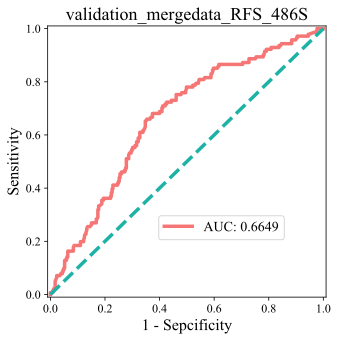

<Figure size 432x288 with 0 Axes>

In [8]:
# 第一种方法
df = pd.read_csv('validation_mergedata_RFS_survival.csv',index_col=None)
labels = pd.read_csv('validation_mergedata_RFS_label.csv',index_col=None)

scores = df.iloc[:,0]
label = np.array(labels['predict_label'])

label = 1-label

# 定义函数
lw = 3.5
ticks_size = 12
label_size = 16
title_size = 18
legend_size = 14
legend_sit = (0.85, 0.3)
figsize = (5, 5)
roc_plot(label,
         scores,
         title="validation_mergedata_RFS_486S"
         #file_name='AUC.pdf',
         #save=True)
        )

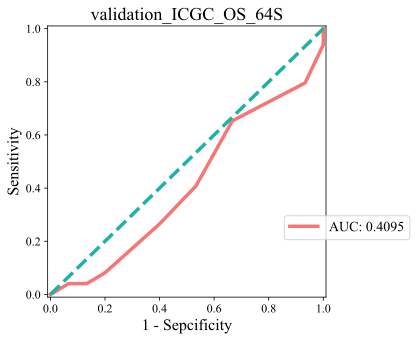

<Figure size 432x288 with 0 Axes>

In [139]:
# 第二种方法

# 阈值 th
# 生存数据
df = pd.read_csv('validation_ICGC_OS_survival.csv',index_col=None)
#预测数据和对的个数

labels = pd.read_csv('validation_ICGC_OS_label.csv',index_col=None)

label = df.iloc[:,0]
scores = np.array(labels['score'])

#th = np.mean(label) # 默认阈值中位数
#print("这套数据患者生存时间中位数是 : %.2f" %th)



th = 36
label = [my_fun(x,th) for x in label]
# 定义函数
lw = 3.5
ticks_size = 12
label_size = 16
title_size = 18
legend_size = 14
legend_sit = (0.85, 0.3)
figsize = (5, 5)
roc_plot(label,
         scores,
         title="validation_ICGC_OS_64S"
         #file_name='AUC.pdf',
         #save=True)
        )

In [ ]:
def plot_precision_vs_recall(label=None,
                             scores=None,
                             file_name=None,
                             save=False):
    precisions, recalls, thresholds = precision_recall_curve(label, scores)
    plt.figure(figsize=figsize)
    plt.plot(thresholds,
             precisions[:-1],
             "b--",
             label="Precision",
             linewidth=lw,
             color=my_colors[3])
    plt.plot(thresholds,
             recalls[:-1],
             "g-",
             label="Recall",
             linewidth=lw,
             color=my_colors[0])
    plt.legend(loc="center right",
               bbox_to_anchor=legend_sit,
               fontsize=legend_size)  # Not shown in the book
    plt.xlabel("CTC Threshold", fontsize=label_size)
    plt.ylabel(
        "Precision/Recall", fontsize=label_size
    )  # Not shown                                                        # Not shown
    plt.yticks(fontsize=ticks_size)
    plt.xticks(fontsize=ticks_size)
    plt.ylim([-0.01, 1.03])
    if save:
        plt.savefig(file_name)
    plt.show()
    plt.clf()
